In [1]:
import numpy as np
import matplotlib.pyplot as plots
from scipy.integrate import odeint

In [2]:
def graficas(t, posY, vel):
  fig, ax = plots.subplots(2, 1, figsize=(6, 4))
  # Grafica de posición vs tiempo
  ax[0].plot(t, posY)
  ax[0].set_xlabel("Tiempo (s)", fontsize=14)
  ax[0].set_ylabel("Posición (m)", fontsize=14)
  ax[0].set_title("Posición vs Tiempo", fontsize=14)
  # Grafica de velocidad vs tiempo
  ax[1].plot(t, vel)
  ax[1].set_xlabel("Tiempo (s)", fontsize=14)
  ax[1].set_ylabel("Velocidad (m/s)", fontsize=14)
  ax[1].set_title("Velocidad vs Tiempo", fontsize=14)
  plots.tight_layout()
  plots.show()

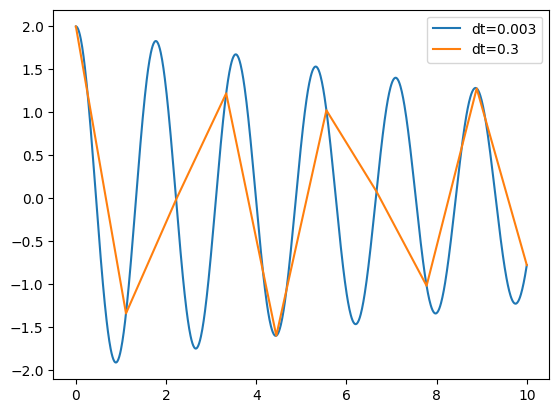

In [3]:
def func(y, t, omega, alpha):
    position = y[0]
    velocity = y[1]
    dydt = velocity
    dvdt = -alpha*velocity - omega*position
    return np.array([dydt, dvdt])
# =======================
# Condciones iniciales
# =======================
y0 = np.array([2, 0])
f=2 #Hz
omega = 2*np.pi*f
alpha = 0.1
t0 = np.linspace(0, 10, 100000)
t1 = np.linspace(0, 10, 1000)
t2 = np.linspace(0, 10, 10)
dt2 = 3/10
dt1 = 3/1000
# =======================
params = (omega, alpha)
solutionED0 = odeint(func, y0, t0, args=params)
solutionED1 = odeint(func, y0, t1, args=params)
solutionED2 = odeint(func, y0, t2, args=params)

plots.plot(t1, solutionED1[:,0], label=f"dt={dt1}")
plots.plot(t2,solutionED2[:,0], label=f"dt={dt2}")
plots.legend()
plots.show()

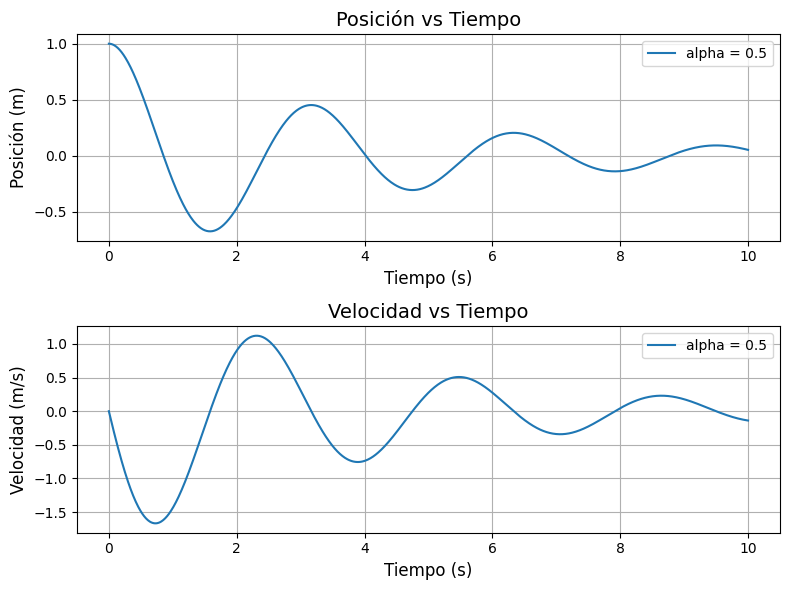

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Define the differential equations
def func(y, t, omega, alpha):
    position = y[0]
    velocity = y[1]
    dydt = velocity
    dvdt = -alpha * velocity - omega * omega * position  # Corrected omega term
    return np.array([dydt, dvdt])

# Define the plotting function
def graficas(t, posY, vel, alpha_val):
    fig, ax = plt.subplots(2, 1, figsize=(8, 6))  # Increased figure size

    ax[0].plot(t, posY, label=f'alpha = {alpha_val}')
    ax[0].set_xlabel("Tiempo (s)", fontsize=12)
    ax[0].set_ylabel("Posición (m)", fontsize=12)
    ax[0].set_title("Posición vs Tiempo", fontsize=14)
    ax[0].legend()
    ax[0].grid(True)  # Added grid

    ax[1].plot(t, vel, label=f'alpha = {alpha_val}')
    ax[1].set_xlabel("Tiempo (s)", fontsize=12)
    ax[1].set_ylabel("Velocidad (m/s)", fontsize=12)
    ax[1].set_title("Velocidad vs Tiempo", fontsize=14)
    ax[1].legend()
    ax[1].grid(True)  # Added grid

    plt.tight_layout()
    plt.show()

# Parameters
omega = 2.0  # Frecuencia angular
alpha = 0.5  # Coeficiente de amortiguamiento
y0 = [1.0, 0.0]  # Condiciones iniciales: posición inicial = 1.0, velocidad inicial = 0.0
t = np.linspace(0, 10, 1000)  # Tiempo de simulación de 0 a 10 segundos con 1000 puntos

# Solve the differential equation
solution = odeint(func, y0, t, args=(omega, alpha))
posY = solution[:, 0]  # Posición
vel = solution[:, 1]  # Velocidad

# Call the plotting function
graficas(t, posY, vel, alpha)